## MAX CLIQUE PROBLEM

## Сделаем маленький граф

In [2]:
import networkx as nx
from docplex.mp.model import Model
import time
import numpy as np
from itertools import combinations

In [3]:
A = [(1,2), (1,3), (2,1), (2,3), (3,1), (3,2), (4,3)]
N = [1, 2, 3, 4]

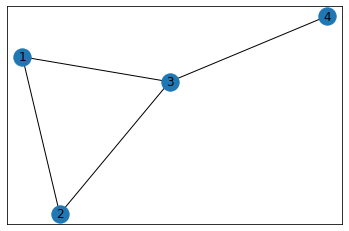

In [4]:
graph = nx.Graph(A)
nx.draw_networkx(graph)

In [5]:
# init model
mdl = Model('my_model')
# init vinaries dict
x = mdl.binary_var_dict(N, name='x')
c = mdl.binary_var_dict(A, name='c')
# objective function
mdl.maximize(mdl.sum(x[i] for i in N))

In [6]:
# constraints
mdl.add_constraints(x[i] + x[j] <= 1 for i in N for j in N if (i,j) not in A and (j,i) not in A and i != j)

[docplex.mp.LinearConstraint[](x_1+x_4,LE,1),
 docplex.mp.LinearConstraint[](x_2+x_4,LE,1),
 docplex.mp.LinearConstraint[](x_1+x_4,LE,1),
 docplex.mp.LinearConstraint[](x_2+x_4,LE,1)]

In [7]:
# get solution
mdl.solve()

docplex.mp.solution.SolveSolution(obj=3,values={x_1:1,x_2:1,x_3:1})

In [8]:
# nodes
mdl.print_solution()
# max clique
mdl.objective_value

objective: 3
  x_1=1
  x_2=1
  x_3=1


3.0

## Dimacs graph

In [9]:
def init_graph(file_name):
    edges = []
    
    with open(file_name, 'r') as file:
        for line in file:
            if line.startswith('c'):  # graph description
                print(line)
            elif line.startswith('p'):
                p, name, vertices_num, edges_num = line.split()
                print('{0} {1} {2}'.format(name, vertices_num, edges_num))
            elif line.startswith('e'):
                _, v1, v2 = line.split()
                edges.append((int(v1), int(v2)))
            else:
                continue
    return edges, vertices_num

In [10]:
def fit_model(edges, vertices_num):
    N = [i for i in range(1, int(vertices_num)+1)]
    # init model
    mdl = Model('my_model')
    # init vinaries dict
    x = mdl.binary_var_dict(N, name='x')
    c = mdl.binary_var_dict(A, name='c')
    # objective function
    mdl.maximize(mdl.sum(x[i] for i in N))
    
    # constraints
    start_time = time.time()
    constraints = mdl.add_constraints(x[i] <= 1 - x[j] for i in N for j in N if (i,j) not in edges and (j,i) not in edges and i != j)
    print('CONSTRAINTS TIME: {}'.format(time.time() - start_time))
    # get solution
    start_time = time.time()
    mdl.solve()
    print('SOLVE TIME: {}'.format(time.time() - start_time))
    return mdl

In [12]:
edges, vertices_num = init_graph('dimacs graphs/gen200_p0.9_44.clq')

c FILE:  gen200_p0.9_44.b

c

c SOURCE: Laura Sanchis (laura@cs.colgate.edu)

c

c DESCRIPTION: Artificially generated instance with large,

c              known embedded clique

c

c 200 vertices 17910 edges 44 max clique

c 200 1990 156 2192 151248 22

edge 200 17910


In [13]:
edges

[(2, 1),
 (3, 1),
 (3, 2),
 (4, 1),
 (4, 2),
 (4, 3),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (7, 1),
 (7, 2),
 (7, 4),
 (7, 5),
 (7, 6),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7),
 (11, 8),
 (11, 10),
 (12, 1),
 (12, 2),
 (12, 3),
 (12, 4),
 (12, 5),
 (12, 6),
 (12, 7),
 (12, 8),
 (12, 9),
 (12, 11),
 (13, 2),
 (13, 4),
 (13, 5),
 (13, 6),
 (13, 7),
 (13, 8),
 (13, 9),
 (13, 10),
 (13, 11),
 (13, 12),
 (14, 1),
 (14, 2),
 (14, 3),
 (14, 4),
 (14, 5),
 (14, 6),
 (14, 7),
 (14, 8),
 (14, 9),
 (14, 10),
 (14, 11),
 (14, 12),
 (14, 13),
 (15, 1),
 (15, 2),
 (15, 3),
 (15, 4),
 (15, 6),
 (15, 7),
 (15, 8),
 (15, 9),
 (15, 10),
 (15, 11),
 (15, 12),
 (15, 13),
 (15, 14),
 (16, 1),
 (16, 2),
 (16, 3),
 (16, 4),


In [14]:
%%time
mdl = fit_model(edges, vertices_num)

CONSTRAINTS TIME: 48.107062101364136
SOLVE TIME: 0.4106419086456299
Wall time: 48.5 s


In [15]:
# nodes
#mdl.print_solution()
# max clique
mdl.objective_value

44.0

In [20]:
mdl.print_solution()

objective: 44
  x_13=1
  x_20=1
  x_29=1
  x_34=1
  x_38=1
  x_40=1
  x_42=1
  x_46=1
  x_47=1
  x_65=1
  x_67=1
  x_72=1
  x_75=1
  x_81=1
  x_82=1
  x_84=1
  x_93=1
  x_94=1
  x_97=1
  x_100=1
  x_102=1
  x_105=1
  x_108=1
  x_117=1
  x_119=1
  x_120=1
  x_123=1
  x_127=1
  x_129=1
  x_132=1
  x_138=1
  x_141=1
  x_146=1
  x_149=1
  x_150=1
  x_151=1
  x_156=1
  x_166=1
  x_170=1
  x_180=1
  x_186=1
  x_190=1
  x_193=1
  x_195=1
None


In [26]:
mdl.solution.__dict__['_var_value_map']

{docplex.mp.Var(type=B,name='x_13'): 1.0,
 docplex.mp.Var(type=B,name='x_20'): 1.0,
 docplex.mp.Var(type=B,name='x_29'): 1.0,
 docplex.mp.Var(type=B,name='x_34'): 1.0,
 docplex.mp.Var(type=B,name='x_38'): 1.0,
 docplex.mp.Var(type=B,name='x_40'): 1.0,
 docplex.mp.Var(type=B,name='x_42'): 1.0,
 docplex.mp.Var(type=B,name='x_46'): 1.0,
 docplex.mp.Var(type=B,name='x_47'): 1.0,
 docplex.mp.Var(type=B,name='x_65'): 1.0,
 docplex.mp.Var(type=B,name='x_67'): 1.0,
 docplex.mp.Var(type=B,name='x_72'): 1.0,
 docplex.mp.Var(type=B,name='x_75'): 1.0,
 docplex.mp.Var(type=B,name='x_81'): 1.0,
 docplex.mp.Var(type=B,name='x_82'): 1.0,
 docplex.mp.Var(type=B,name='x_84'): 1.0,
 docplex.mp.Var(type=B,name='x_93'): 1.0,
 docplex.mp.Var(type=B,name='x_94'): 1.0,
 docplex.mp.Var(type=B,name='x_97'): 1.0,
 docplex.mp.Var(type=B,name='x_100'): 1.0,
 docplex.mp.Var(type=B,name='x_102'): 1.0,
 docplex.mp.Var(type=B,name='x_105'): 1.0,
 docplex.mp.Var(type=B,name='x_108'): 1.0,
 docplex.mp.Var(type=B,name='x

In [13]:
%%time
mdl = fit_model(np.array(edges), vertices_num)

CONSTRAINTS TIME: 51.27270269393921
SOLVE TIME: 0.004056453704833984
Wall time: 51.3 s


In [14]:
# nodes
#mdl.print_solution()
# max clique
mdl.objective_value

378.0

Реализация всех ограничений занимает намного больше времени, чем расчеты, пичально, возможно не стоит ее проводить циклом. При этом если инициализируем как np.array, работает намного быстрее